<a href="https://colab.research.google.com/github/AniketMishra23/Mnist-Dataset/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Hand Written Digit Recognization***
*By Aniket Bharat Mishra*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

import tensorflow

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
from keras import utils as np_utils

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape,  x_test.shape,  y_test.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_img(i):
    plt.imshow(x_train[i] , cmap='binary')
    plt.title(y_train[i])
    plt.show()

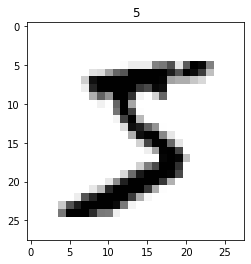

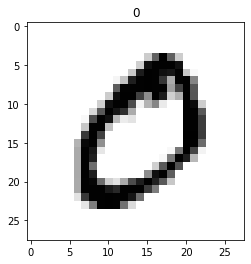

In [5]:
for i in range(2):
  plot_input_img(i)

In [6]:
#Preprocessing the image

#Normalizing the image in [0,1] range
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

#Reshape / Expand the dimension of images to (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#Convert class to one hot vector
y_train =  tensorflow.keras.utils.to_categorical(y_train)
y_test =  tensorflow.keras.utils.to_categorical(y_test)

In [7]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape = (28, 28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3) , activation= 'relu') )
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [9]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
#Earlystopping

es = EarlyStopping(monitor= 'val_acc', min_delta= 0.01, patience= 4, verbose= 1)
#Model Check Point
mc = ModelCheckpoint("./bestmodel.h5", monitors= "val acc", verbose= 1, save_best_onlys= True)

cb = [es,mc]

In [11]:
his = model.fit(x_train, y_train, epochs= 5, validation_split= 0.3, callbacks= cb)

Epoch 1/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.2165 - accuracy: 0.9350


Epoch 1: saving model to ./bestmodel.h5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.2164 - accuracy: 0.9350 - val_loss: 0.0803 - val_accuracy: 0.9761
Epoch 2/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9758


Epoch 2: saving model to ./bestmodel.h5
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0774 - accuracy: 0.9759 - val_loss: 0.0602 - val_accuracy: 0.9817
Epoch 3/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0557 - accuracy: 0.9825


Epoch 3: saving model to ./bestmodel.h5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0558 - accuracy: 0.9824 - val_loss: 0.0489 - val_accuracy: 0.9848
Epoch 4/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9859


Epoch 4: saving model to ./bestmodel.h5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0454 - val_accuracy: 0.9860
Epoch 5/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9877


Epoch 5: saving model to ./bestmodel.h5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0407 - val_accuracy: 0.9877


In [12]:
import numpy as np 
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [13]:
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
accuracy_score(y_pred,rounded_labels)

0.989